In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve

# **Initial Observation**

In [ ]:
df_train = pd.read_csv('aug_train.csv')
df_train.head()


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [ ]:
# We won't delete any whole columns since more than 75% of the data is available for each column
df_train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [ ]:
df_train.shape

(19158, 14)

In [ ]:
#Scanning for anomalies 

df_train["enrollee_id"].unique()
df_train["city"].unique()
df_train["city_development_index"].unique()
df_train["gender"].unique()
df_train["relevent_experience"].unique()
df_train["enrolled_university"].unique()
#df_train["enrolled_university"].mode()
#df_train["education_level"].unique()
#df_train["major_discipline"].unique()
#df_train["experience"].unique()
#df_train["company_size"].unique()
#df_train["company_type"].unique()
#df_train["last_new_job"].unique()
#df_train["training_hours"].unique()
#df_train["target"].unique()



array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [ ]:
#Note: All columns with integer and float values do not have NULL values

# **Data Cleaning**

In [ ]:
df_train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

We have a total of 8 columns with missing data. 

The rows of 4 columns can be simply removed since there are very few nan values (enrolled_university, education_level, experience, last_new_job

In [ ]:
df_train = df_train.dropna(axis=0, subset=['enrolled_university'])
df_train = df_train.dropna(axis=0, subset=['education_level'])
df_train = df_train.dropna(axis=0, subset=['experience'])
df_train = df_train.dropna(axis=0, subset=['last_new_job'])


In [ ]:
#Some columns have categorical data in only a few columns. This needs adjustment as well
df_train["experience"].unique()

array(['>20', '15', '5', '11', '13', '7', '17', '2', '16', '1', '4', '10',
       '<1', '14', '18', '19', '12', '6', '9', '3', '8', '20'],
      dtype=object)

We will deal with the remaining columns and their null values individually

In [ ]:
#dealing with the remaining missing values


#Replaced missing gender with undefined
df_train['gender'] = df_train['gender'].replace(np.nan, "Undefined")

df_train.gender.isna().sum()


#Replaced these with mode
df_train['major_discipline'] = df_train['major_discipline'].replace(np.nan, "STEM")

df_train.major_discipline.isna().sum()

df_train['company_type'] = df_train['company_type'].replace(np.nan, 'Pvt Ltd')

df_train.company_type.isna().sum()


#For the experience column, first we will convert it from categorical to numerical
df_train.experience.replace('>20',22,inplace=True)


df_train.experience.replace('<1',0,inplace=True)

df_train.experience=pd.to_numeric(df_train.experience)

#After this we will convert the column to three different classes
df_train.experience=np.where(df_train.experience >=10,'Highly-experienced', np.where(df_train.experience >=4,'Intermediate-experienced' ,'In-experienced/Low-experience'))

set(df_train.experience)

#For the relevent_experience column, we will convert the values to 1 and 0 to be used later for training
set(df_train.relevent_experience)
df_train.relevent_experience.replace(['Has relevent experience', 'No relevent experience'],[1,0],inplace=True)

set(df_train.relevent_experience)


#Last new job column: since we have dropped the null values, we will now convert it to a numerical column
df_train.last_new_job.replace('>4','5',inplace=True)

df_train.last_new_job.replace('never','0',inplace=True)

set(df_train.last_new_job) 
df_train.last_new_job=pd.to_numeric(df_train.last_new_job)

set(df_train.last_new_job)


#company_size column: following the same logic as experience column
df_train.company_size.replace('<10','Small',inplace=True)


df_train.company_size.replace('10/49','Small',inplace=True)


df_train.company_size.replace('50-99','Small',inplace=True)


df_train.company_size.replace('100-500','Small',inplace=True)


df_train.company_size.replace('500-999','Medium',inplace=True)


df_train.company_size.replace('1000-4999',"Medium",inplace=True)


df_train.company_size.replace('5000-9999','Large',inplace=True)


df_train.company_size.replace('10000+','Large',inplace=True)

df_train["company_size"]=df_train["company_size"].replace(np.nan, "undefined")

df_train=df_train.rename(columns={'target': 'looking_for_job'})





In [ ]:
df_train.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
looking_for_job           0
dtype: int64

# **Data Visualisation**

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(
    data=go.Bar(x = ["Male","Female","Other","undefined"],y=list(df_train.gender.value_counts())),
)
fig.update_layout(
    xaxis_title="Gender",
    yaxis_title="Number of employees",)
fig.update_layout(
    title={
        'text':"Gender of employees",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [ ]:
 company_types =dict(df_train.company_type.value_counts())
 company_types.keys()

dict_keys(['Pvt Ltd', 'Funded Startup', 'Public Sector', 'Early Stage Startup', 'NGO', 'Other'])

In [ ]:
import plotly.express as px

In [ ]:

fig2 = go.Figure()
fig2.add_trace(go.Bar(y=df_train.company_type.value_counts(),
                      x = ['Pvt Ltd', 'Funded Startup', 'Public Sector', 'Early Stage Startup', 'NGO', 'Other'])
)
fig2.update_layout(
    xaxis_title="company_type",
    yaxis_title="Number of employees",)
fig2.update_layout(
    title={
        'text':"Number of employees by company type",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig2.show()

In [ ]:
#since correlation matrix didn't give us much info on it so we  are using a box and whisker plot to understand the reation of city development index with target
fig = px.box(df_train, y="city_development_index",x= 'looking_for_job',title="Relation of city development index with individuals looking for a job")
fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [ ]:

cor = df_train.corr()
# fig = ff.create_annotated_heatmap(x =list(df_train.corr().keys()),y =list(df_train.corr().keys()), z=cor,colorscale='Viridis')
# fig.show()

trace = plotly.graph_objs.Heatmap(x =list(df_train.corr().keys()),y =list(df_train.corr().keys()), z=cor)
data=[trace]
fig = plotly.graph_objs.FigureWidget(data=data)
fig.update_layout(
    title={
        'text': "Correlation matrix",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.layout.height = 750
fig.layout.width =750
plotly.offline.iplot(fig)

#run again

In [ ]:
df_train.corr().keys()

Index(['enrollee_id', 'city_development_index', 'relevent_experience',
       'last_new_job', 'training_hours', 'looking_for_job'],
      dtype='object')

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(y=df_train.city.value_counts(),
                      x = list(df_train.city.value_counts().keys()))

)
fig.update_layout(
    xaxis_title="city",
    yaxis_title="Number of employees",)
fig.update_layout(
    title={
        'text':"Number of employees in each city",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()







In [ ]:
# fig = px.box(df_train, y="relevent_experience",x= 'looking_for_job',title="Relation of relevent_experience with looking_for_job")
# fig.update_layout(
#     title={
#         'y':0.9,
#         'x':0.5,
#         'xanchor': 'center',
#         'yanchor': 'top'})
# fig.show()
vals = df_train.city.value_counts().values[:5]
keys = dict(df_train.city.value_counts()[:5])
print(keys.keys(),vals)

dict_keys(['city_103', 'city_21', 'city_16', 'city_114', 'city_160']) [4194 2454 1471 1254  817]


In [ ]:
#56 percent of data is collected from  these 5 cities
data = vals.sum()/ df_train.city.value_counts().sum()
data*100

56.567114466526036

In [ ]:
df_train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,looking_for_job
0,8949,city_103,0.920,Male,1,no_enrollment,Graduate,STEM,Highly-experienced,undefined,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,Male,0,no_enrollment,Graduate,STEM,Highly-experienced,Small,Pvt Ltd,5,47,0.0
2,11561,city_21,0.624,Undefined,0,Full time course,Graduate,STEM,Intermediate-experienced,undefined,Pvt Ltd,0,83,0.0
4,666,city_162,0.767,Male,1,no_enrollment,Masters,STEM,Highly-experienced,Small,Funded Startup,4,8,0.0
5,21651,city_176,0.764,Undefined,1,Part time course,Graduate,STEM,Highly-experienced,undefined,Pvt Ltd,1,24,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,0,no_enrollment,Graduate,Humanities,Highly-experienced,undefined,Pvt Ltd,1,42,1.0
19154,31398,city_103,0.920,Male,1,no_enrollment,Graduate,STEM,Highly-experienced,undefined,Pvt Ltd,4,52,1.0
19155,24576,city_103,0.920,Male,1,no_enrollment,Graduate,STEM,Highly-experienced,Small,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,1,no_enrollment,High School,STEM,In-experienced/Low-experience,Medium,Pvt Ltd,2,97,0.0


In [ ]:
one_hot = pd.get_dummies(df_train[['enrolled_university','gender'
                    ,'company_type','company_size','experience',
                    'major_discipline','education_level']])

df_train.drop(['enrolled_university','gender','company_type',
               'company_size','experience','major_discipline',
               'education_level'],axis=1, inplace=True)


In [ ]:
data = pd.concat([df_train, one_hot],axis=1)

In [ ]:

def ordinal_encode(df):
    city = {
    'city':list(set(df['city']))}
    
    for i in city:
        unique = list(df[i].unique())
        df[i] = df[i].apply(lambda x: city[i].index(x))
    return df
ordinal_encode(data)


,enrollee_id,city,city_development_index,relevent_experience,last_new_job,training_hours,looking_for_job,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,gender_Female,gender_Male,gender_Other,gender_Undefined,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_size_Large,company_size_Medium,company_size_Small,company_size_undefined,experience_Highly-experienced,experience_In-experienced/Low-experience,experience_Intermediate-experienced,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,education_level_Graduate,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School
0,8949,1,0.920,1,1,36,1.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0
1,29725,41,0.776,0,5,47,0.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
2,11561,75,0.624,0,0,83,0.0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0
4,666,106,0.767,1,4,8,0.0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
5,21651,42,0.764,1,1,24,1.0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,83,0.878,0,1,42,1.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0
19154,31398,1,0.920,1,4,52,1.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0
19155,24576,1,0.920,1,4,44,0.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
19156,5756,44,0.802,1,2,97,0.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0


In [ ]:
X= data.drop(['looking_for_job'],axis=1)

y= data['looking_for_job']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
y_test.value_counts()

0.0    3381
1.0    1123
Name: looking_for_job, dtype: int64

([<matplotlib.axis.XTick at 0x7f84290755d0>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

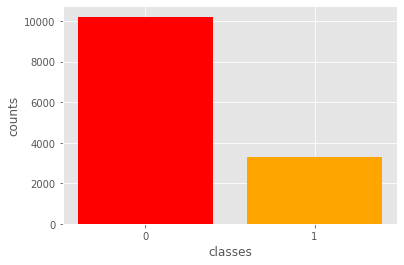

In [ ]:
keys= list(y_train.value_counts().keys())
vals= list(y_train.value_counts().values)
plt.style.use('ggplot')
plt.bar(keys,vals,color =['r','orange'])
plt.xlabel("classes")
plt.ylabel('counts')
plt.xticks(keys,["0","1"])

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# oversampling the train dataset using SMOTE
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

X_train = pd.DataFrame(X_train_sm)
y_train = pd.Series(y_train_sm)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



([<matplotlib.axis.XTick at 0x7f84287de6d0>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

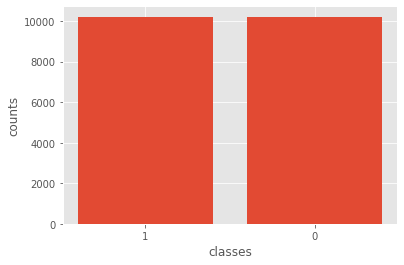

In [ ]:
keys= list(y_train.value_counts().keys())
vals= list(y_train.value_counts().values)
plt.style.use('ggplot')
plt.bar(keys,vals)
plt.xlabel("classes")
plt.ylabel('counts')
plt.xticks(keys,["0","1"])

In [ ]:
def test_eval(clf_model, X_test, y_test,):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    plot_confusion_matrix(clf_model, X_test, y_test,cmap = 'YlOrBr')
    plt.grid(False)  
    plt.show() 

    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
          

# Logistic regression


Confusion Matrix


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



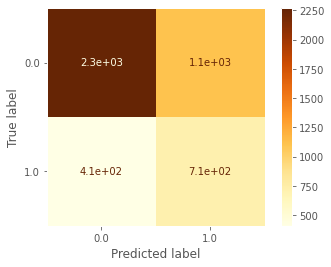

Classification Report
              precision    recall  f1-score   support

         0.0       0.85      0.67      0.75      3381
         1.0       0.39      0.64      0.48      1123

    accuracy                           0.66      4504
   macro avg       0.62      0.65      0.62      4504
weighted avg       0.73      0.66      0.68      4504
 

AUC-ROC
0.6951878432274222


In [ ]:

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
preds = clf.predict(X_test)
test_eval(clf,X_test, y_test)

In [ ]:
importance = clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00405
Feature: 2, Score: -0.27052
Feature: 3, Score: -0.22290
Feature: 4, Score: 0.05391
Feature: 5, Score: -0.00373
Feature: 6, Score: 0.28375
Feature: 7, Score: -0.00669
Feature: 8, Score: -0.23136
Feature: 9, Score: 0.01047
Feature: 10, Score: -0.14734
Feature: 11, Score: 0.00753
Feature: 12, Score: 0.17503
Feature: 13, Score: -0.00451
Feature: 14, Score: -0.09081
Feature: 15, Score: -0.02273
Feature: 16, Score: 0.00312
Feature: 17, Score: -0.00386
Feature: 18, Score: 0.16447
Feature: 19, Score: -0.09143
Feature: 20, Score: -0.17350
Feature: 21, Score: -0.43565
Feature: 22, Score: 0.74629
Feature: 23, Score: -0.36189
Feature: 24, Score: 0.28467
Feature: 25, Score: 0.12292
Feature: 26, Score: -0.00533
Feature: 27, Score: 0.00604
Feature: 28, Score: -0.01233
Feature: 29, Score: 0.00518
Feature: 30, Score: 0.00829
Feature: 31, Score: 0.04385
Feature: 32, Score: 0.36016
Feature: 33, Score: -0.16166
Feature: 34, Score: -0.07377
Feature: 35,

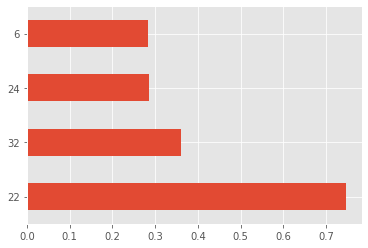

In [ ]:
feat_importances = pd.Series(importance, index=list(X_train.columns))
feat_importances.nlargest(4).plot(kind='barh')
#most important features(top 4)

# Random forest Classifier
uses grid search to find optimal parameters for the model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [10,200,300,400,500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [5,10,20,30,40,50]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
import pprint
pprint.pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [5, 10, 20, 30, 40, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 200, 300, 400, 500]}


In [ ]:
#choosing the right parmeters for the model using RandomizedSearchCV
rf_model = RandomForestClassifier()
clf_RF = RandomizedSearchCV(rf_model, random_grid,cv = 3,
                            verbose=2, random_state=42, n_jobs = -1)
clf_RF.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

Confusion Matrix


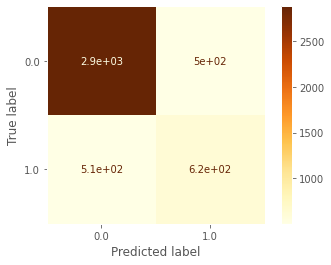

Classification Report
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85      3381
         1.0       0.55      0.55      0.55      1123

    accuracy                           0.78      4504
   macro avg       0.70      0.70      0.70      4504
weighted avg       0.78      0.78      0.78      4504
 

AUC-ROC
0.7856484418847876


In [ ]:
test_eval(clf_RF, X_test, y_test)

# Gradient boost Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()

gb_params = { 
    "n_estimators":[1,3,5,10,15,20,30,40,50,],
    'learning_rate': [0.1, 0.05, 0.02, 0.01],
    'max_depth': [2,6,8,10,12,15],
    'min_samples_split': [2,5,10,15,20],
    'min_samples_leaf': [1,2,4]
}
#choosing the right parmeters for the model using RandomizedSearchCV
clf_gb=RandomizedSearchCV(gb_model,gb_params,cv=5, scoring='roc_auc',n_jobs=1)

clf_gb.fit(X_train, y_train)
clf_gb.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Confusion Matrix


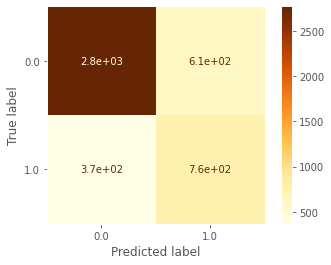

Classification Report
              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85      3381
         1.0       0.56      0.67      0.61      1123

    accuracy                           0.78      4504
   macro avg       0.72      0.75      0.73      4504
weighted avg       0.80      0.78      0.79      4504
 

AUC-ROC
0.7944005353893464


In [ ]:
#we were able to get the highest accuracy and AUC-ROC score with gradient boost classifier
test_eval(clf_gb, X_test, y_test)

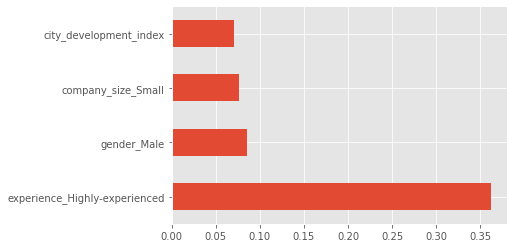

In [ ]:
def Featureimportances(models):
    model = models
    model.fit(X_train,y_train)
    importances = model.feature_importances_
    features = X_train.columns
    imp = pd.DataFrame({'Features': list(X_test), 'Importance': importances})
    
    imp['Importance'].nlargest(4).plot(kind='barh')
    li = list(imp['Importance'].nlargest(4))
    lis = list(imp['Importance'].nlargest(4).index)
    fs =list(X_test.columns)
    labels =[fs[i] for i in lis]
    plt.yticks(range(4), [fs[i] for i in lis])

Featureimportances(GradientBoostingClassifier(n_estimators=500, learning_rate=1, max_features=2, max_depth=2, random_state=0))